In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

import warnings; warnings.simplefilter('ignore')

from brainpedia.brainpedia import BrainPedia
from brainpedia.fmri_processing import invert_preprocessor_scaling
from models.ICW_FMRI_GAN import Critic, Generator
from nilearn import plotting
from torch.autograd import Variable
from tqdm import tqdm

Fix random seed for reproducibility.

In [2]:
np.random.seed(1)

CUDA = torch.cuda.is_available()
if CUDA:
    torch.cuda.manual_seed(1)
    print("CUDA is available...")
else:
    torch.manual_seed(1)
    print("CUDA is NOT available...")

CUDA is available...


# Data

Download the full [Neurovault](https://neurovault.org) Collection 1952 [BrainPedia](https://neurovault.org/collections/1952/) dataset.

In [3]:
BrainPedia.downloadIfNecessary()

Reading local neurovault data.
Already fetched 1 image
Already fetched 2 images
Already fetched 3 images
Already fetched 4 images
Already fetched 5 images
Already fetched 6 images
Already fetched 7 images
Already fetched 8 images
Already fetched 9 images
Already fetched 10 images
Already fetched 11 images
Already fetched 12 images
Already fetched 13 images
Already fetched 14 images
Already fetched 15 images
Already fetched 16 images
Already fetched 17 images
Already fetched 18 images
Already fetched 19 images
Already fetched 20 images
Already fetched 21 images
Already fetched 22 images
Already fetched 23 images
Already fetched 24 images
Already fetched 25 images
Already fetched 26 images
Already fetched 27 images
Already fetched 28 images
Already fetched 29 images
Already fetched 30 images
Already fetched 31 images
Already fetched 32 images
Already fetched 33 images
Already fetched 34 images
Already fetched 35 images
Already fetched 36 images
Already fetched 37 images
Already fetched 3

Already fetched 559 images
Already fetched 560 images
Already fetched 561 images
Already fetched 562 images
Already fetched 563 images
Already fetched 564 images
Already fetched 565 images
Already fetched 566 images
Already fetched 567 images
Already fetched 568 images
Already fetched 569 images
Already fetched 570 images
Already fetched 571 images
Already fetched 572 images
Already fetched 573 images
Already fetched 574 images
Already fetched 575 images
Already fetched 576 images
Already fetched 577 images
Already fetched 578 images
Already fetched 579 images
Already fetched 580 images
Already fetched 581 images
Already fetched 582 images
Already fetched 583 images
Already fetched 584 images
Already fetched 585 images
Already fetched 586 images
Already fetched 587 images
Already fetched 588 images
Already fetched 589 images
Already fetched 590 images
Already fetched 591 images
Already fetched 592 images
Already fetched 593 images
Already fetched 594 images
Already fetched 595 images
A

Already fetched 871 images
Already fetched 872 images
Already fetched 873 images
Already fetched 874 images
Already fetched 875 images
Already fetched 876 images
Already fetched 877 images
Already fetched 878 images
Already fetched 879 images
Already fetched 880 images
Already fetched 881 images
Already fetched 882 images
Already fetched 883 images
Already fetched 884 images
Already fetched 885 images
Already fetched 886 images
Already fetched 887 images
Already fetched 888 images
Already fetched 889 images
Already fetched 890 images
Already fetched 891 images
Already fetched 892 images
Already fetched 893 images
Already fetched 894 images
Already fetched 895 images
Already fetched 896 images
Already fetched 897 images
Already fetched 898 images
Already fetched 899 images
Already fetched 900 images
Already fetched 901 images
Already fetched 902 images
Already fetched 903 images
Already fetched 904 images
Already fetched 905 images
Already fetched 906 images
Already fetched 907 images
A

Already fetched 1172 images
Already fetched 1173 images
Already fetched 1174 images
Already fetched 1175 images
Already fetched 1176 images
Already fetched 1177 images
Already fetched 1178 images
Already fetched 1179 images
Already fetched 1180 images
Already fetched 1181 images
Already fetched 1182 images
Already fetched 1183 images
Already fetched 1184 images
Already fetched 1185 images
Already fetched 1186 images
Already fetched 1187 images
Already fetched 1188 images
Already fetched 1189 images
Already fetched 1190 images
Already fetched 1191 images
Already fetched 1192 images
Already fetched 1193 images
Already fetched 1194 images
Already fetched 1195 images
Already fetched 1196 images
Already fetched 1197 images
Already fetched 1198 images
Already fetched 1199 images
Already fetched 1200 images
Already fetched 1201 images
Already fetched 1202 images
Already fetched 1203 images
Already fetched 1204 images
Already fetched 1205 images
Already fetched 1206 images
Already fetched 1207

Already fetched 1483 images
Already fetched 1484 images
Already fetched 1485 images
Already fetched 1486 images
Already fetched 1487 images
Already fetched 1488 images
Already fetched 1489 images
Already fetched 1490 images
Already fetched 1491 images
Already fetched 1492 images
Already fetched 1493 images
Already fetched 1494 images
Already fetched 1495 images
Already fetched 1496 images
Already fetched 1497 images
Already fetched 1498 images
Already fetched 1499 images
Already fetched 1500 images
Already fetched 1501 images
Already fetched 1502 images
Already fetched 1503 images
Already fetched 1504 images
Already fetched 1505 images
Already fetched 1506 images
Already fetched 1507 images
Already fetched 1508 images
Already fetched 1509 images
Already fetched 1510 images
Already fetched 1511 images
Already fetched 1512 images
Already fetched 1513 images
Already fetched 1514 images
Already fetched 1515 images
Already fetched 1516 images
Already fetched 1517 images
Already fetched 1518

Already fetched 1785 images
Already fetched 1786 images
Already fetched 1787 images
Already fetched 1788 images
Already fetched 1789 images
Already fetched 1790 images
Already fetched 1791 images
Already fetched 1792 images
Already fetched 1793 images
Already fetched 1794 images
Already fetched 1795 images
Already fetched 1796 images
Already fetched 1797 images
Already fetched 1798 images
Already fetched 1799 images
Already fetched 1800 images
Already fetched 1801 images
Already fetched 1802 images
Already fetched 1803 images
Already fetched 1804 images
Already fetched 1805 images
Already fetched 1806 images
Already fetched 1807 images
Already fetched 1808 images
Already fetched 1809 images
Already fetched 1810 images
Already fetched 1811 images
Already fetched 1812 images
Already fetched 1813 images
Already fetched 1814 images
Already fetched 1815 images
Already fetched 1816 images
Already fetched 1817 images
Already fetched 1818 images
Already fetched 1819 images
Already fetched 1820

Already fetched 2217 images
Already fetched 2218 images
Already fetched 2219 images
Already fetched 2220 images
Already fetched 2221 images
Already fetched 2222 images
Already fetched 2223 images
Already fetched 2224 images
Already fetched 2225 images
Already fetched 2226 images
Already fetched 2227 images
Already fetched 2228 images
Already fetched 2229 images
Already fetched 2230 images
Already fetched 2231 images
Already fetched 2232 images
Already fetched 2233 images
Already fetched 2234 images
Already fetched 2235 images
Already fetched 2236 images
Already fetched 2237 images
Already fetched 2238 images
Already fetched 2239 images
Already fetched 2240 images
Already fetched 2241 images
Already fetched 2242 images
Already fetched 2243 images
Already fetched 2244 images
Already fetched 2245 images
Already fetched 2246 images
Already fetched 2247 images
Already fetched 2248 images
Already fetched 2249 images
Already fetched 2250 images
Already fetched 2251 images
Already fetched 2252

Already fetched 2547 images
Already fetched 2548 images
Already fetched 2549 images
Already fetched 2550 images
Already fetched 2551 images
Already fetched 2552 images
Already fetched 2553 images
Already fetched 2554 images
Already fetched 2555 images
Already fetched 2556 images
Already fetched 2557 images
Already fetched 2558 images
Already fetched 2559 images
Already fetched 2560 images
Already fetched 2561 images
Already fetched 2562 images
Already fetched 2563 images
Already fetched 2564 images
Already fetched 2565 images
Already fetched 2566 images
Already fetched 2567 images
Already fetched 2568 images
Already fetched 2569 images
Already fetched 2570 images
Already fetched 2571 images
Already fetched 2572 images
Already fetched 2573 images
Already fetched 2574 images
Already fetched 2575 images
Already fetched 2576 images
Already fetched 2577 images
Already fetched 2578 images
Already fetched 2579 images
Already fetched 2580 images
Already fetched 2581 images
Already fetched 2582

Already fetched 2863 images
Already fetched 2864 images
Already fetched 2865 images
Already fetched 2866 images
Already fetched 2867 images
Already fetched 2868 images
Already fetched 2869 images
Already fetched 2870 images
Already fetched 2871 images
Already fetched 2872 images
Already fetched 2873 images
Already fetched 2874 images
Already fetched 2875 images
Already fetched 2876 images
Already fetched 2877 images
Already fetched 2878 images
Already fetched 2879 images
Already fetched 2880 images
Already fetched 2881 images
Already fetched 2882 images
Already fetched 2883 images
Already fetched 2884 images
Already fetched 2885 images
Already fetched 2886 images
Already fetched 2887 images
Already fetched 2888 images
Already fetched 2889 images
Already fetched 2890 images
Already fetched 2891 images
Already fetched 2892 images
Already fetched 2893 images
Already fetched 2894 images
Already fetched 2895 images
Already fetched 2896 images
Already fetched 2897 images
Already fetched 2898

Already fetched 3449 images
Already fetched 3450 images
Already fetched 3451 images
Already fetched 3452 images
Already fetched 3453 images
Already fetched 3454 images
Already fetched 3455 images
Already fetched 3456 images
Already fetched 3457 images
Already fetched 3458 images
Already fetched 3459 images
Already fetched 3460 images
Already fetched 3461 images
Already fetched 3462 images
Already fetched 3463 images
Already fetched 3464 images
Already fetched 3465 images
Already fetched 3466 images
Already fetched 3467 images
Already fetched 3468 images
Already fetched 3469 images
Already fetched 3470 images
Already fetched 3471 images
Already fetched 3472 images
Already fetched 3473 images
Already fetched 3474 images
Already fetched 3475 images
Already fetched 3476 images
Already fetched 3477 images
Already fetched 3478 images
Already fetched 3479 images
Already fetched 3480 images
Already fetched 3481 images
Already fetched 3482 images
Already fetched 3483 images
Already fetched 3484

Already fetched 3779 images
Already fetched 3780 images
Already fetched 3781 images
Already fetched 3782 images
Already fetched 3783 images
Already fetched 3784 images
Already fetched 3785 images
Already fetched 3786 images
Already fetched 3787 images
Already fetched 3788 images
Already fetched 3789 images
Already fetched 3790 images
Already fetched 3791 images
Already fetched 3792 images
Already fetched 3793 images
Already fetched 3794 images
Already fetched 3795 images
Already fetched 3796 images
Already fetched 3797 images
Already fetched 3798 images
Already fetched 3799 images
Already fetched 3800 images
Already fetched 3801 images
Already fetched 3802 images
Already fetched 3803 images
Already fetched 3804 images
Already fetched 3805 images
Already fetched 3806 images
Already fetched 3807 images
Already fetched 3808 images
Already fetched 3809 images
Already fetched 3810 images
Already fetched 3811 images
Already fetched 3812 images
Already fetched 3813 images
Already fetched 3814

Already fetched 4109 images
Already fetched 4110 images
Already fetched 4111 images
Already fetched 4112 images
Already fetched 4113 images
Already fetched 4114 images
Already fetched 4115 images
Already fetched 4116 images
Already fetched 4117 images
Already fetched 4118 images
Already fetched 4119 images
Already fetched 4120 images
Already fetched 4121 images
Already fetched 4122 images
Already fetched 4123 images
Already fetched 4124 images
Already fetched 4125 images
Already fetched 4126 images
Already fetched 4127 images
Already fetched 4128 images
Already fetched 4129 images
Already fetched 4130 images
Already fetched 4131 images
Already fetched 4132 images
Already fetched 4133 images
Already fetched 4134 images
Already fetched 4135 images
Already fetched 4136 images
Already fetched 4137 images
Already fetched 4138 images
Already fetched 4139 images
Already fetched 4140 images
Already fetched 4141 images
Already fetched 4142 images
Already fetched 4143 images
Already fetched 4144

Already fetched 4532 images
Already fetched 4533 images
Already fetched 4534 images
Already fetched 4535 images
Already fetched 4536 images
Already fetched 4537 images
Already fetched 4538 images
Already fetched 4539 images
Already fetched 4540 images
Already fetched 4541 images
Already fetched 4542 images
Already fetched 4543 images
Already fetched 4544 images
Already fetched 4545 images
Already fetched 4546 images
Already fetched 4547 images
Already fetched 4548 images
Already fetched 4549 images
Already fetched 4550 images
Already fetched 4551 images
Already fetched 4552 images
Already fetched 4553 images
Already fetched 4554 images
Already fetched 4555 images
Already fetched 4556 images
Already fetched 4557 images
Already fetched 4558 images
Already fetched 4559 images
Already fetched 4560 images
Already fetched 4561 images
Already fetched 4562 images
Already fetched 4563 images
Already fetched 4564 images
Already fetched 4565 images
Already fetched 4566 images
Already fetched 4567

Already fetched 4837 images
Already fetched 4838 images
Already fetched 4839 images
Already fetched 4840 images
Already fetched 4841 images
Already fetched 4842 images
Already fetched 4843 images
Already fetched 4844 images
Already fetched 4845 images
Already fetched 4846 images
Already fetched 4847 images
Already fetched 4848 images
Already fetched 4849 images
Already fetched 4850 images
Already fetched 4851 images
Already fetched 4852 images
Already fetched 4853 images
Already fetched 4854 images
Already fetched 4855 images
Already fetched 4856 images
Already fetched 4857 images
Already fetched 4858 images
Already fetched 4859 images
Already fetched 4860 images
Already fetched 4861 images
Already fetched 4862 images
Already fetched 4863 images
Already fetched 4864 images
Already fetched 4865 images
Already fetched 4866 images
Already fetched 4867 images
Already fetched 4868 images
Already fetched 4869 images
Already fetched 4870 images
Already fetched 4871 images
Already fetched 4872

Already fetched 5169 images
Already fetched 5170 images
Already fetched 5171 images
Already fetched 5172 images
Already fetched 5173 images
Already fetched 5174 images
Already fetched 5175 images
Already fetched 5176 images
Already fetched 5177 images
Already fetched 5178 images
Already fetched 5179 images
Already fetched 5180 images
Already fetched 5181 images
Already fetched 5182 images
Already fetched 5183 images
Already fetched 5184 images
Already fetched 5185 images
Already fetched 5186 images
Already fetched 5187 images
Already fetched 5188 images
Already fetched 5189 images
Already fetched 5190 images
Already fetched 5191 images
Already fetched 5192 images
Already fetched 5193 images
Already fetched 5194 images
Already fetched 5195 images
Already fetched 5196 images
Already fetched 5197 images
Already fetched 5198 images
Already fetched 5199 images
Already fetched 5200 images
Already fetched 5201 images
Already fetched 5202 images
Already fetched 5203 images
Already fetched 5204

Already fetched 5679 images
Already fetched 5680 images
Already fetched 5681 images
Already fetched 5682 images
Already fetched 5683 images
Already fetched 5684 images
Already fetched 5685 images
Already fetched 5686 images
Already fetched 5687 images
Already fetched 5688 images
Already fetched 5689 images
Already fetched 5690 images
Already fetched 5691 images
Already fetched 5692 images
Already fetched 5693 images
Already fetched 5694 images
Already fetched 5695 images
Already fetched 5696 images
Already fetched 5697 images
Already fetched 5698 images
Already fetched 5699 images
Already fetched 5700 images
Already fetched 5701 images
Already fetched 5702 images
Already fetched 5703 images
Already fetched 5704 images
Already fetched 5705 images
Already fetched 5706 images
Already fetched 5707 images
Already fetched 5708 images
Already fetched 5709 images
Already fetched 5710 images
Already fetched 5711 images
Already fetched 5712 images
Already fetched 5713 images
Already fetched 5714

Already fetched 5976 images
Already fetched 5977 images
Already fetched 5978 images
Already fetched 5979 images
Already fetched 5980 images
Already fetched 5981 images
Already fetched 5982 images
Already fetched 5983 images
Already fetched 5984 images
Already fetched 5985 images
Already fetched 5986 images
Already fetched 5987 images
Already fetched 5988 images
Already fetched 5989 images
Already fetched 5990 images
Already fetched 5991 images
Already fetched 5992 images
Already fetched 5993 images
Already fetched 5994 images
Already fetched 5995 images
Already fetched 5996 images
Already fetched 5997 images
Already fetched 5998 images
Already fetched 5999 images
Already fetched 6000 images
Already fetched 6001 images
Already fetched 6002 images
Already fetched 6003 images
Already fetched 6004 images
Already fetched 6005 images
Already fetched 6006 images
Already fetched 6007 images
Already fetched 6008 images
Already fetched 6009 images
Already fetched 6010 images
Already fetched 6011

Already fetched 6295 images
Already fetched 6296 images
Already fetched 6297 images
Already fetched 6298 images
Already fetched 6299 images
Already fetched 6300 images
Already fetched 6301 images
Already fetched 6302 images
Already fetched 6303 images
Already fetched 6304 images
Already fetched 6305 images
Already fetched 6306 images
Already fetched 6307 images
Already fetched 6308 images
Already fetched 6309 images
Already fetched 6310 images
Already fetched 6311 images
Already fetched 6312 images
Already fetched 6313 images
Already fetched 6314 images
Already fetched 6315 images
Already fetched 6316 images
Already fetched 6317 images
Already fetched 6318 images
Already fetched 6319 images
Already fetched 6320 images
Already fetched 6321 images
Already fetched 6322 images
Already fetched 6323 images
Already fetched 6324 images
Already fetched 6325 images
Already fetched 6326 images
Already fetched 6327 images
Already fetched 6328 images
Already fetched 6329 images
Already fetched 6330

Setup path to data directory and cache directory path to store preprocessed data.

In [4]:
DATA_DIR = 'neurovault/collection_1952/'
CACHE_DIR = 'neurovault/preprocessed_collection_1952/'

Setup dataset parameters.

In [5]:
DOWNSAMPLE_SCALE = 0.25
BATCH_SIZE = 128

Load the dataset into memory.

In [7]:
brainpedia = BrainPedia(data_dirs=[DATA_DIR],
                        cache_dir=CACHE_DIR,
                        scale=DOWNSAMPLE_SCALE)
all_brain_data, all_brain_data_tags = brainpedia.all_data()
brainpedia_batch_generator = BrainPedia.batch_generator(all_brain_data, all_brain_data_tags, BATCH_SIZE, CUDA)
brain_data_shape, brain_data_tag_shape = brainpedia.sample_shapes()

### Plot Example Data Point

Grab an example brain volume and upsample.

In [8]:
all_brain_data.shape

(6573, 1, 13, 15, 11)

In [9]:
example_brain_data = all_brain_data[0].squeeze()
example_brain_data.shape

(13, 15, 11)

In [10]:
upsampled_example_brain_data = invert_preprocessor_scaling(example_brain_data, brainpedia.preprocessor)
upsampled_example_brain_data.shape

(53, 63, 46, 1)

Grab the task description tags for the example brain volume and decode the one-hot encoded tags vector to their english descriptions.

In [11]:
all_brain_data_tags.shape

(6573, 19)

In [12]:
example_brain_data_tags = all_brain_data_tags[0]
example_brain_data_tags

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [13]:
example_brain_data_decoded_tags = brainpedia.preprocessor.decode_label(example_brain_data_tags)
example_brain_data_decoded_tags

['visual words', 'left hand', 'visual']

Plot example brain volume and their task description tags.

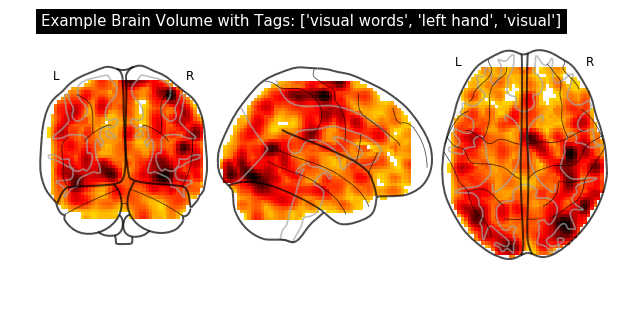

In [20]:
figure = plt.figure(figsize=(8, 4))
plotting.plot_glass_brain(stat_map_img=upsampled_example_brain_data,
                          threshold='auto',
                          title="Example Brain Volume with Tags: {0}".format(example_brain_data_decoded_tags),
                          figure=figure)
plt.show()

# Models

Setup model hyperparameters.

In [21]:
MODEL_DIMENSIONALITY = 64
CONDITONING_DIMENSIONALITY = 5

CRITIC_UPDATES_PER_GENERATOR_UPDATE = 1

NOISE_SAMPLE_LENGTH = 128

Construct models.

NOTE: Depending on the hyperparameter settings above, the dimensionality of the label vector, noise vector, and layers may not exactly match the figure below.

![ICW-fMRI-GAN Model Architecture](models/resources/architecture.png)

In [22]:
generator = Generator(input_size=NOISE_SAMPLE_LENGTH,
                      output_shape=brain_data_shape,
                      dimensionality=MODEL_DIMENSIONALITY,
                      num_classes=brain_data_tag_shape[0],
                      conditioning_dimensionality=CONDITONING_DIMENSIONALITY,
                      cudaEnabled=CUDA)
critic = Critic(dimensionality=MODEL_DIMENSIONALITY,
                num_classes=brain_data_tag_shape[0],
                conditioning_dimensionality=CONDITONING_DIMENSIONALITY,
                cudaEnabled=CUDA)

#### Load and Save Pretrained Models

In [23]:
generator_weight_path = 'models/weights/generator.pt'
critic_weight_path = 'models/weights/critic.pt'
epoch_weight_path = 'models/weights/epoch.npy'

In [24]:
def save_checkpoint(epoch):
    torch.save(generator.state_dict(), generator_weight_path)
    torch.save(critic.state_dict(), critic_weight_path)
    np.save(epoch_weight_path, epoch)

In [25]:
def load_checkpoint():
    epochs_trained = 0
    if os.path.exists(generator_weight_path) and os.path.exists(critic_weight_path) and os.path.exists(epoch_weight_path):
        generator.load_state_dict(torch.load(generator_weight_path))
        critic.load_state_dict(torch.load(critic_weight_path))
        epochs_trained = np.load(epoch_weight_path) + 1
        print("Loaded models with {} epochs pretrained...".format(epochs_trained))
    else:
        print("Starting from scratch...")
    return epochs_trained

# Training

In [26]:
NUM_EPOCHS_TO_TRAIN = 5
LAMBDA = 10

Objective to optimize:

![ICW-fMRI-GAN Model Objective](models/resources/objective.png)

In [27]:
def noise(size, cuda=False):
    noise = torch.from_numpy(np.random.normal(0.0, size=size)).float()
    if cuda:
        noise = noise.cuda()
    return noise

In [28]:
def train(epoch):
    
    sum_critic_loss = 0.0
    sum_generator_loss = 0.0
    num_batches_in_epoch = all_brain_data.shape[0] // BATCH_SIZE
    
    for _ in tqdm(range(num_batches_in_epoch)):
        
        data_batch, label_batch = next(brainpedia_batch_generator)
        data_batch = Variable(data_batch)
        label_batch = Variable(label_batch)
                    
        # (1) Train critic to distinguish between real and synthetic brain samples
        for critic_step in range(CRITIC_UPDATES_PER_GENERATOR_UPDATE):

            # Generate synthetic data batch for true labels
            critic_noise_batch = Variable(noise(size=(label_batch.shape[0], NOISE_SAMPLE_LENGTH), cuda=CUDA))
            synthetic_data_batch = generator(critic_noise_batch, label_batch)
            
            # Train critic to distinguish between the real and synthetic brain samples
            critic_loss = critic.train(data_batch, synthetic_data_batch, label_batch, LAMBDA)
            sum_critic_loss += critic_loss.item()

        # (2) Train generator to fool critic
        generator_noise_batch = Variable(noise(size=(label_batch.shape[0], NOISE_SAMPLE_LENGTH), cuda=CUDA))
        synthetic_data_batch = generator(generator_noise_batch, label_batch)
        critic_predictions = critic(synthetic_data_batch, label_batch)
        generator_loss = generator.train(critic_predictions)
        sum_generator_loss += generator_loss.item()
                        
    return sum_critic_loss / num_batches_in_epoch, sum_generator_loss / num_batches_in_epoch

In [29]:
def visualize(epoch):
    
    for data_batch, label_batch in brainpedia_batch_generator:
        
        # Visualize real samples vs synthetic samples
        num_samples_to_visualize = min(data_batch.shape[0], 5)
        fig = plt.figure(figsize=(10*num_samples_to_visualize, 10))
        
        # Generate synthetic samples for labels
        noise_g = Variable(noise(size=(label_batch.shape[0], NOISE_SAMPLE_LENGTH), cuda=CUDA))
        synthetic_data_batch = generator(noise_g, label_batch)
        
        # Visualize comparison between real and synthetic samples
        subplot_idx = 1
        
        for sample_idx in range(num_samples_to_visualize):
            
            data = data_batch[sample_idx]
            synthetic_data = synthetic_data_batch[sample_idx]
            label = label_batch[sample_idx]
            
            data = data.cpu().data.numpy().squeeze()
            synthetic_data = synthetic_data.cpu().data.numpy().squeeze()
            label = brainpedia.preprocessor.decode_label(label)
            
            # Upsample 
            upsampled_data = invert_preprocessor_scaling(data, brainpedia.preprocessor)
            upsampled_synthetic_data = invert_preprocessor_scaling(synthetic_data, brainpedia.preprocessor)

            # Visualize samples
            ax = fig.add_subplot(2, num_samples_to_visualize, subplot_idx)
            plotting.plot_glass_brain(stat_map_img=upsampled_data,
                                      threshold='auto',
                                      title="True {0}".format(label),
                                      axes=ax)
            ax = fig.add_subplot(2, num_samples_to_visualize, subplot_idx+num_samples_to_visualize)
            plotting.plot_glass_brain(stat_map_img=upsampled_synthetic_data,
                                      threshold='auto',
                                      title="Synthetic {0}".format(label),
                                      axes=ax)
            subplot_idx += 1
        
        plt.show()
        break

  0%|          | 0/51 [00:00<?, ?it/s]

Loaded models with 11 epochs pretrained...


100%|██████████| 51/51 [01:10<00:00,  1.39s/it]


========= EPOCH 11 ==========
CRITIC LOSS   : 0.0237
GENERATOR LOSS: -1.8009



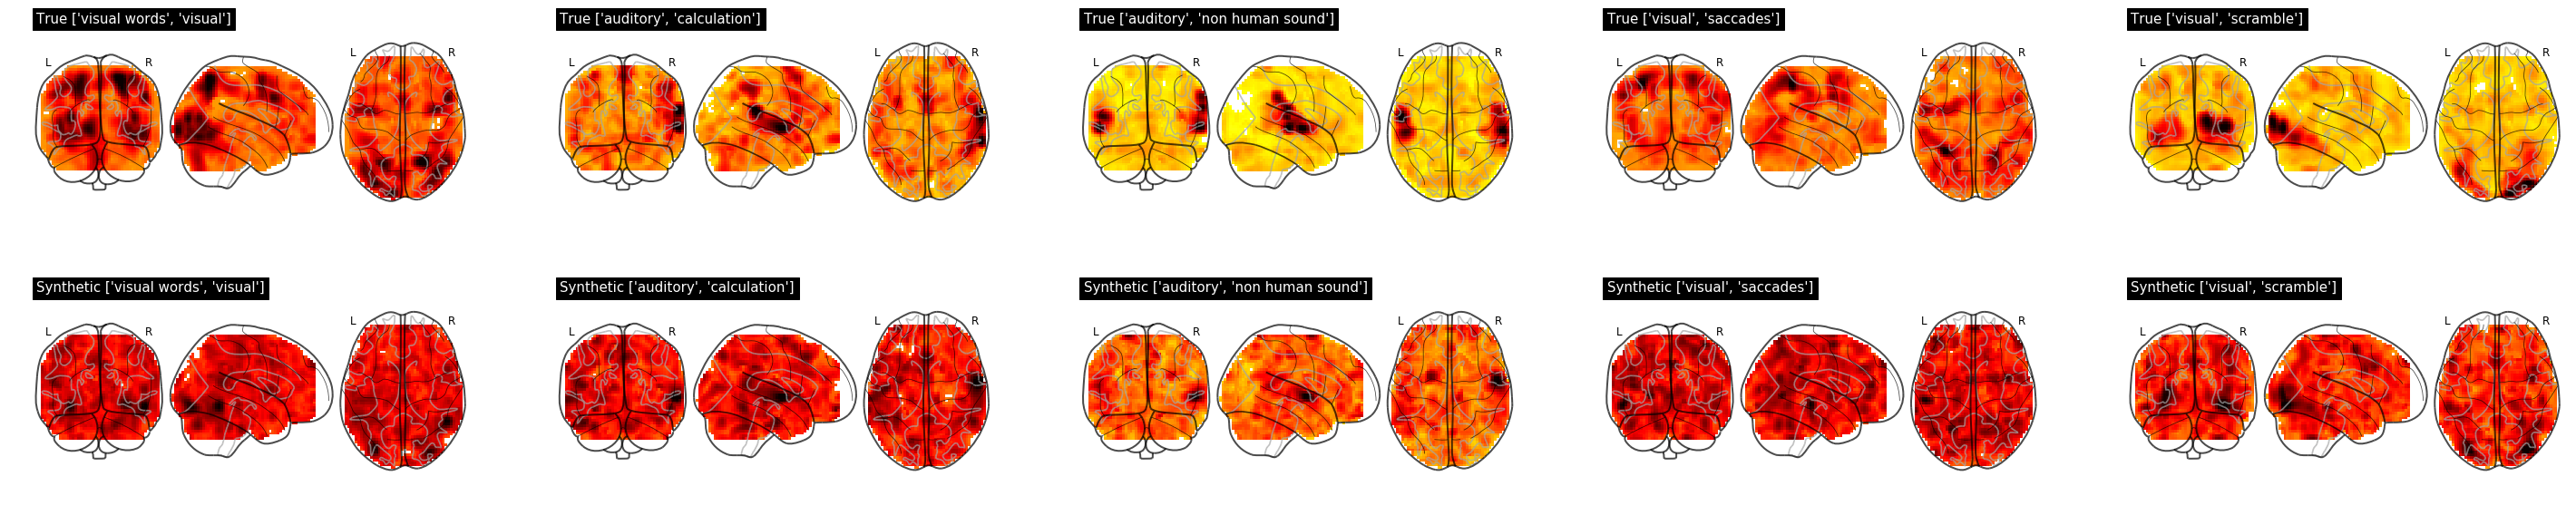

100%|██████████| 51/51 [01:10<00:00,  1.32s/it]


========= EPOCH 12 ==========
CRITIC LOSS   : 0.0209
GENERATOR LOSS: -1.8595



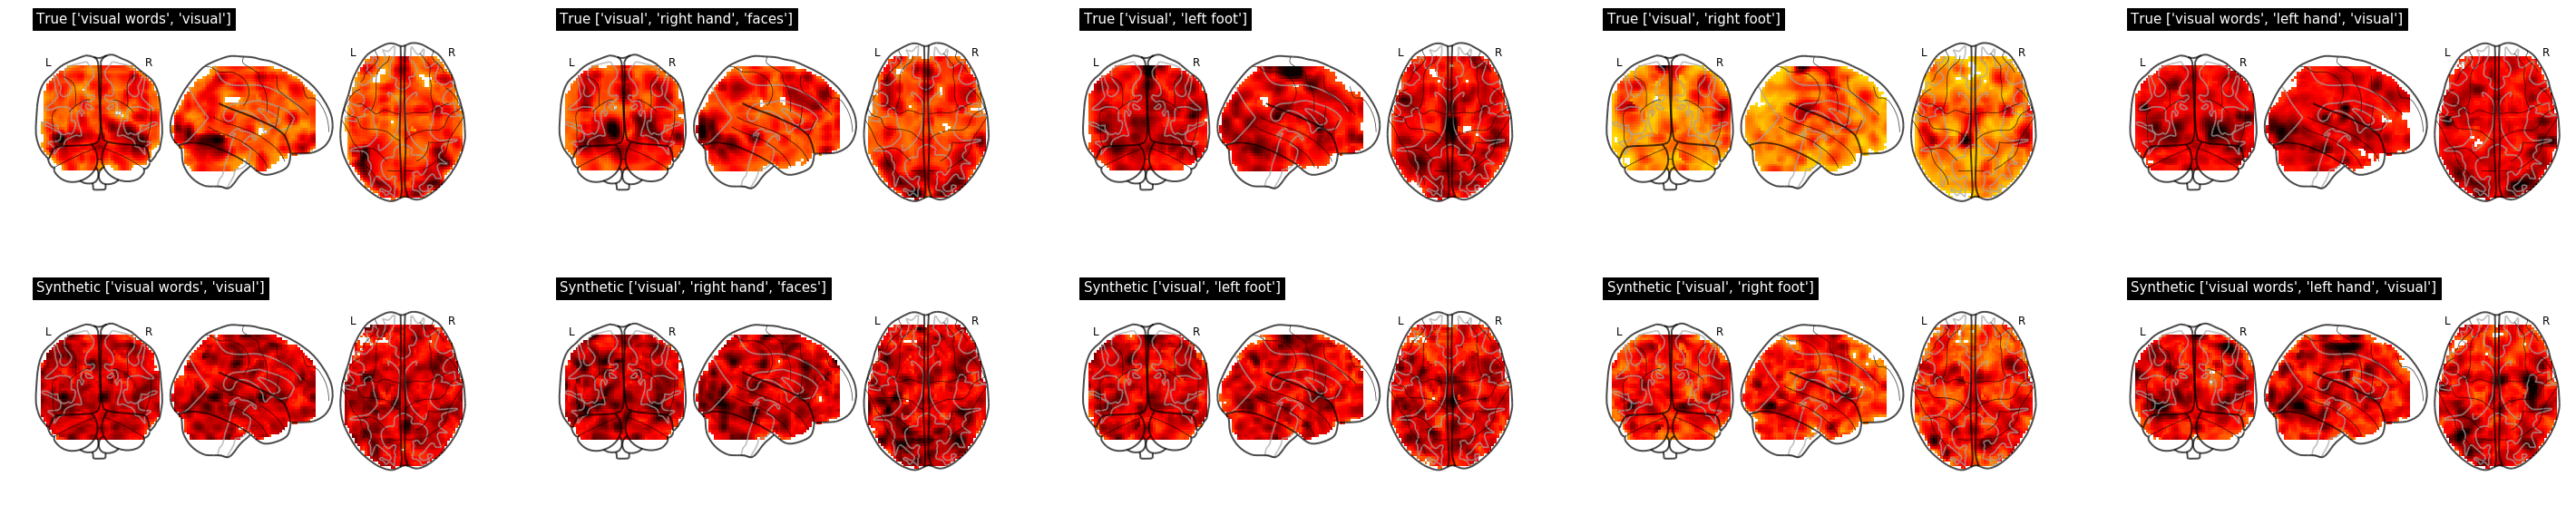

100%|██████████| 51/51 [01:10<00:00,  1.40s/it]


========= EPOCH 13 ==========
CRITIC LOSS   : 0.0226
GENERATOR LOSS: -1.7995



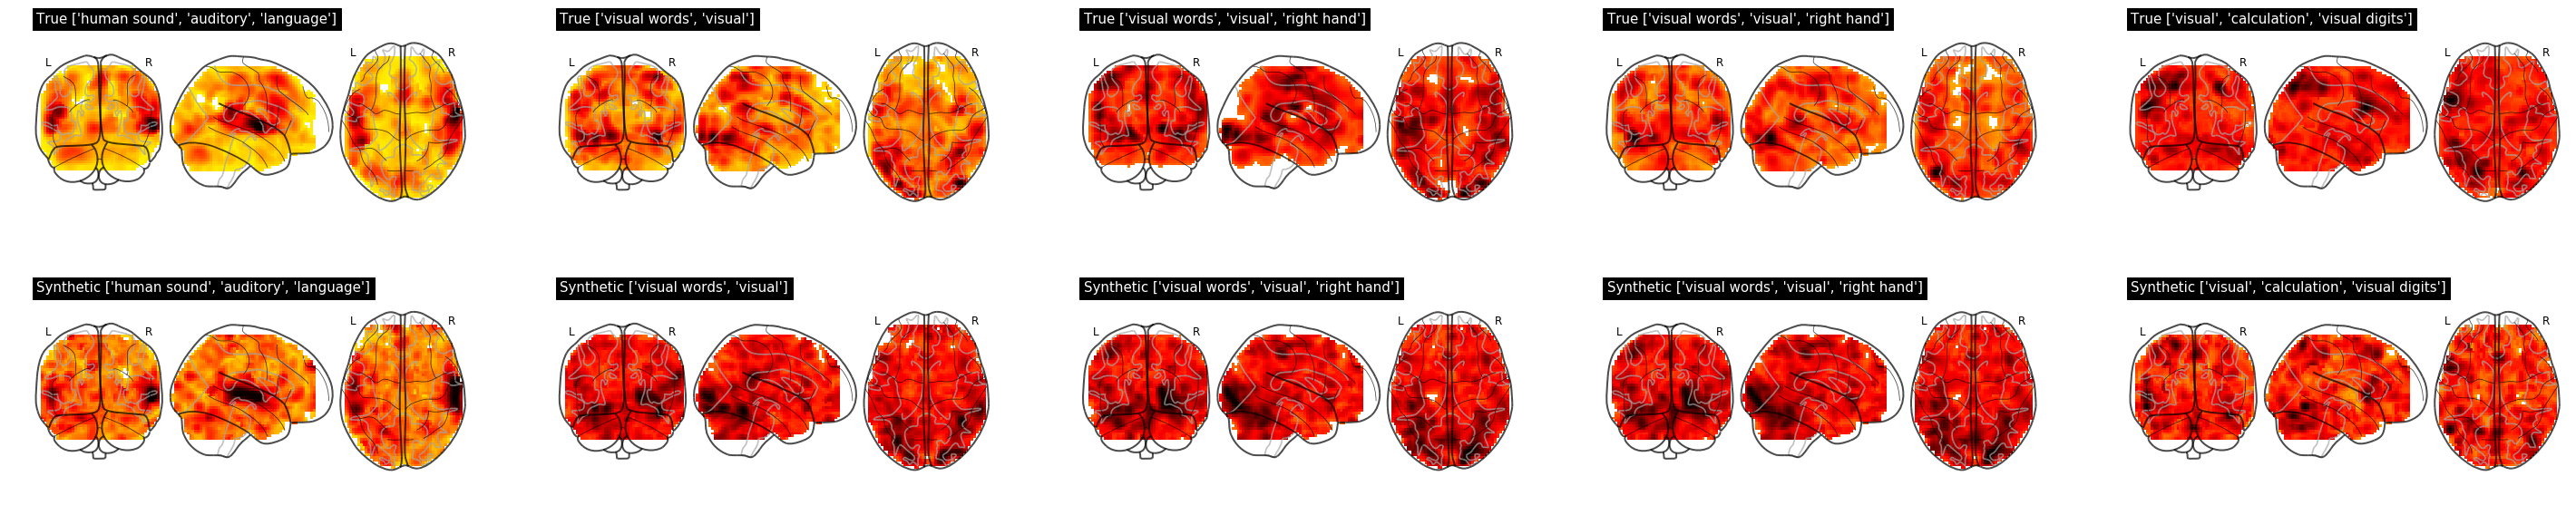

100%|██████████| 51/51 [01:10<00:00,  1.34s/it]


========= EPOCH 14 ==========
CRITIC LOSS   : -0.0027
GENERATOR LOSS: -1.7905



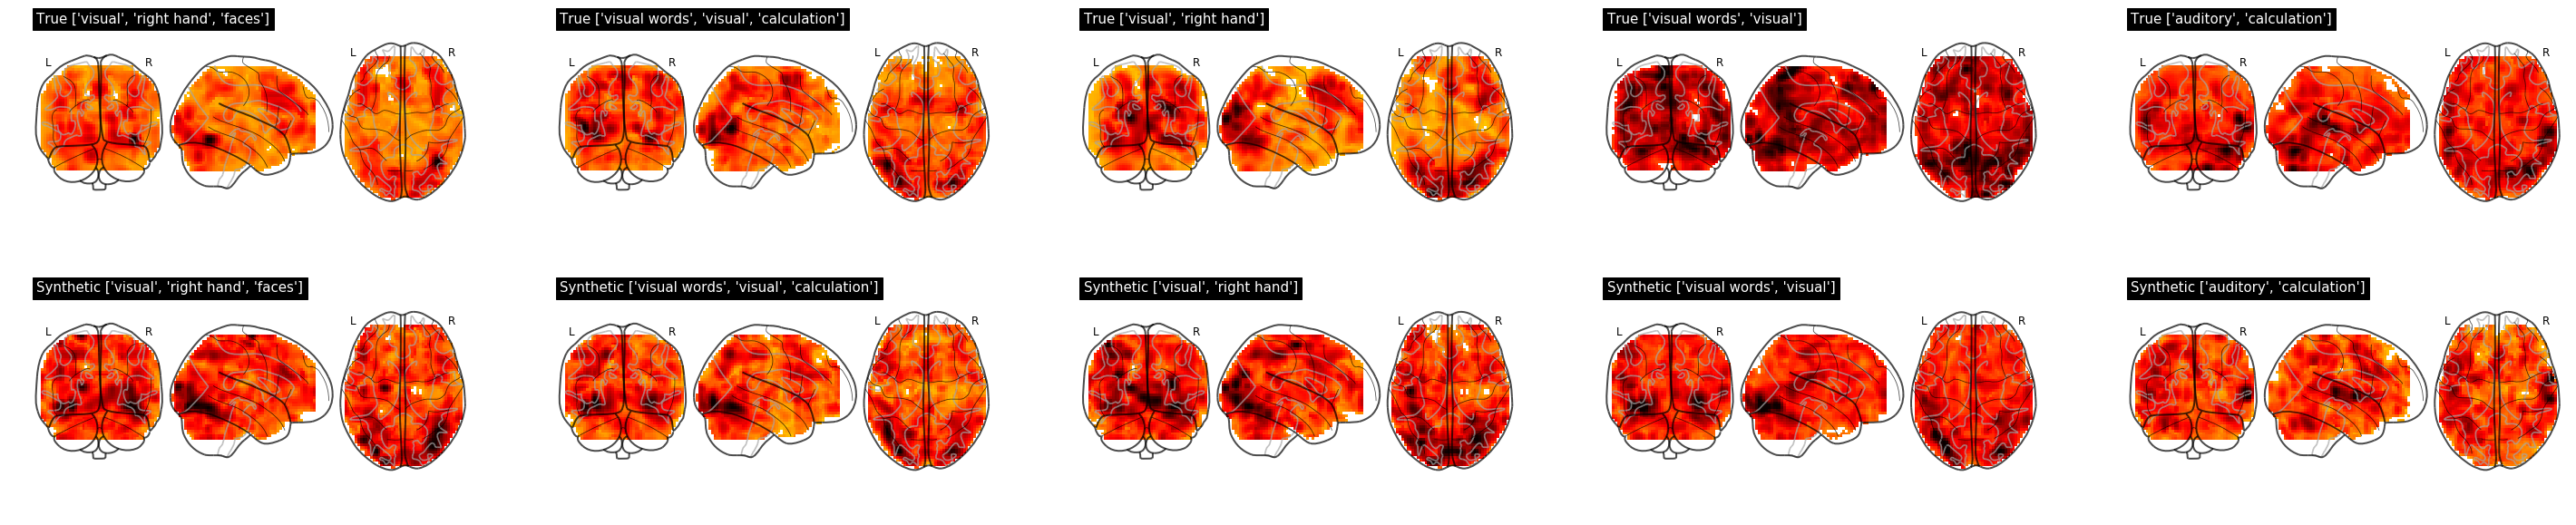

100%|██████████| 51/51 [01:10<00:00,  1.35s/it]


========= EPOCH 15 ==========
CRITIC LOSS   : -0.0049
GENERATOR LOSS: -1.8248



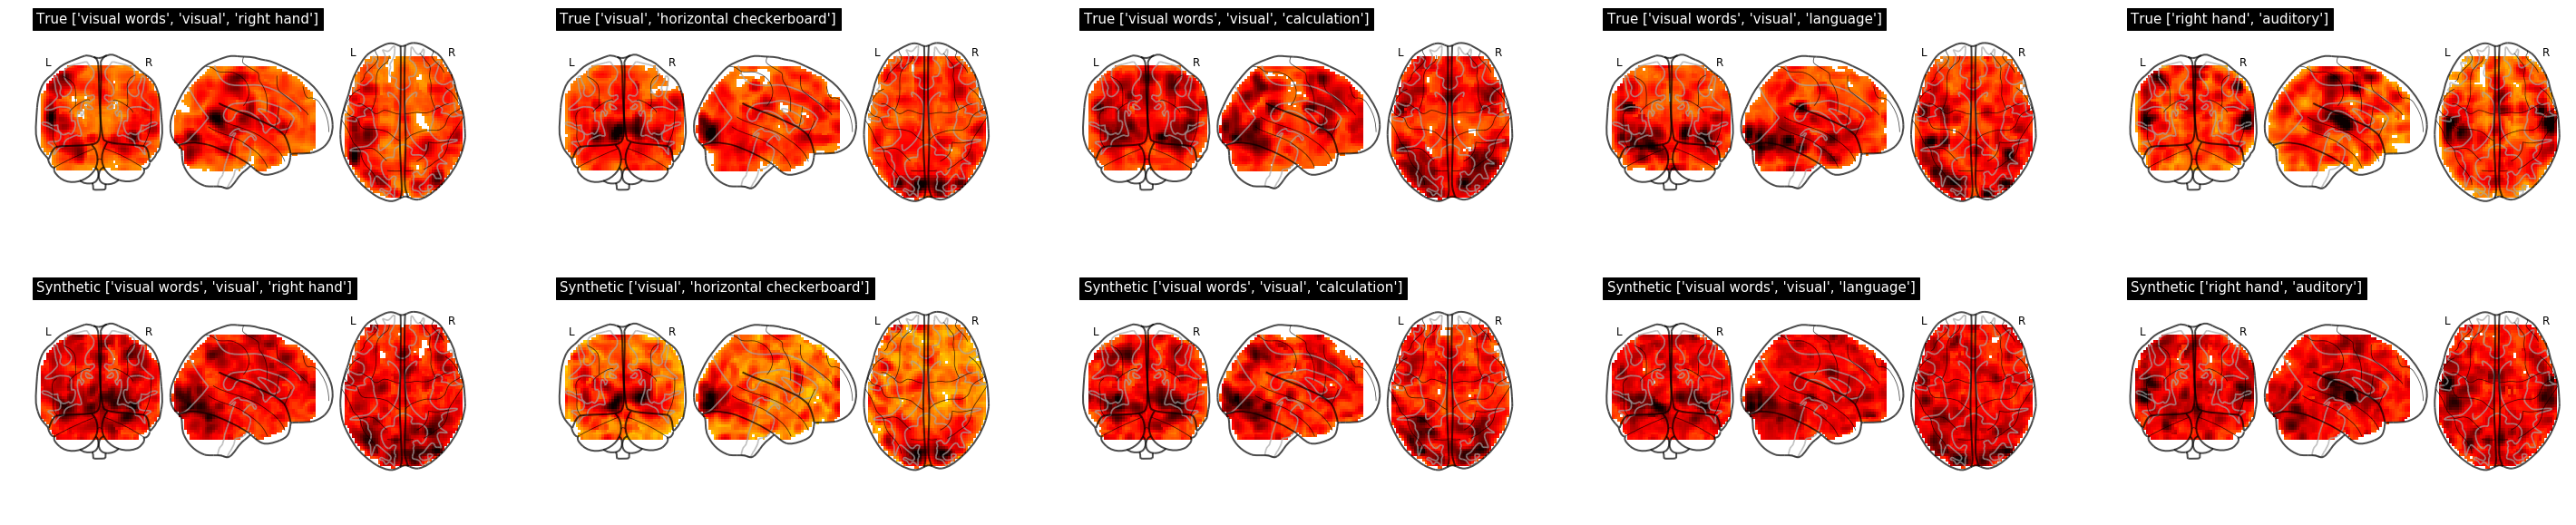

In [30]:
epochs_pretrained = load_checkpoint()

for epoch in range(epochs_pretrained, epochs_pretrained+NUM_EPOCHS_TO_TRAIN):
    
    # Train for an epoch
    critic_loss, generator_loss = train(epoch)
    
    print("========= EPOCH {0} ==========".format(epoch))
    print("CRITIC LOSS   : {0:.4f}".format(critic_loss))
    print("GENERATOR LOSS: {0:.4f}\n".format(generator_loss))
    
    # Checkpoint model
    save_checkpoint(epoch)
    
    # Visualize model output
    visualize(epoch)
    